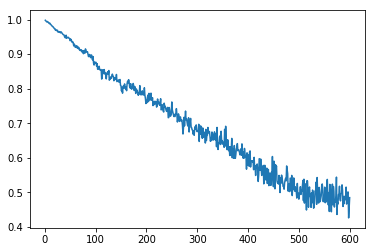

In [2]:
# write your code here
from sklearn.datasets import load_svmlight_file
from numpy import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

t_X,t_y=load_svmlight_file("./a9a.txt")
t_X=t_X.todense()  #转化为普通矩阵

t_X_row_num,t_X_column_num=shape(t_X)

ones_column = ones((t_X_row_num,1)) 
t_X=hstack((ones_column,t_X))
t_X_column_num +=1  #矩阵加一列1

#将数据集切分为训练集和验证集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( t_X, t_y, test_size=0.33, random_state=3)


#w全零初始化
w = zeros((1,t_X_column_num))
w_temple=zeros((1,t_X_column_num))

eta = 0.00047
maxCycles=600
train_size = y_train.size
test_size=y_test.size
p_test_loss=[]

#定义函数c()
def c(x,y,w):
    if(y*(w*x.T)<1):
        return -y
    return 0

def shuffle_data_index(data_size):
    arr_index = []
    for i in range(data_size):
        arr_index.append(i)
    random.shuffle (arr_index)
    return arr_index


def testLogRegres(w, X_test, y_test):
    total_cost=0
    shuffled_arr = shuffle_data_index(y_test.size)
    for m in range(1000): 
        index = shuffled_arr[m]
        cost = float(max(0,1-y_train[index]*(w*X_train[index].T)))
        total_cost += cost
        
    j = total_cost/(m+1)
    return j


#用于图显示
p_x = []
p_train_loss = []
p_validation_loss = []


shuffled_arr = shuffle_data_index(train_size)
for m in range(maxCycles): 
    index = shuffled_arr[m]
    w=w-(eta*(c(X_train[index],y_train[index],w_temple))*X_train[index])
        
    p_x.append(m+1)
    test_loss=testLogRegres(w, X_test, y_test)
    p_test_loss.append(test_loss)
    
plt.plot(p_x, p_test_loss,label="train loss")   
# print(p_test_loss)
    

